In [1]:
import re
import json
import numpy as np
import pandas as pd

from tqdm.auto import tqdm
tqdm.pandas()

import kagglehub
from IPython.display import display, SVG, HTML

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
metric = kagglehub.package_import('jiazhuang/svg-image-fidelity')

Installing python dependencies for Package 'kagglehub_package_jiazhuang_svg_image_fidelity_10', logging progress to '/tmp/kagglehub-package-dependencies-install-v71j4ma_.txt'.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

## Load Data

### Train Data

In [3]:
drawing_with_llms_path = kagglehub.competition_download('drawing-with-llms')
train_df = pd.read_csv(f'{drawing_with_llms_path}/train.csv')
train_question_df = pd.read_parquet(f'{drawing_with_llms_path}/questions.parquet')

train_question_df = train_question_df.groupby('id').apply(lambda df: df.to_dict(orient='list'))
train_question_df = train_question_df.reset_index(name='qa')

train_question_df['question'] = train_question_df.qa.apply(lambda qa: json.dumps(qa['question'], ensure_ascii=False))

train_question_df['choices'] = train_question_df.qa.apply(
    lambda qa: json.dumps(
        [x.tolist() for x in qa['choices']], ensure_ascii=False
    )
)

train_question_df['answer'] = train_question_df.qa.apply(lambda qa: json.dumps(qa['answer'], ensure_ascii=False))

train_df = pd.merge(train_df, train_question_df, how='left', on='id')

train_df.head()

<ipython-input-3-11ff5080b667>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_question_df = train_question_df.groupby('id').apply(lambda df: df.to_dict(orient='list'))


,id,description,qa,question,choices,answer
0,02d892,a purple forest at dusk,"{'id': ['02d892', '02d892', '02d892', '02d892'...","[""What is the main setting of the image?"", ""Is...","[[""beach"", ""desert"", ""forest"", ""mountain""], [""...","[""forest"", ""yes"", ""dusk"", ""purple""]"
1,0dcd2e,gray wool coat with a faux fur collar,"{'id': ['0dcd2e', '0dcd2e', '0dcd2e', '0dcd2e'...","[""What color is the coat?"", ""What part of the ...","[[""blue"", ""brown"", ""gray"", ""red""], [""collar"", ...","[""gray"", ""collar"", ""no"", ""wool""]"
2,1e9ac1,a lighthouse overlooking the ocean,"{'id': ['1e9ac1', '1e9ac1', '1e9ac1', '1e9ac1'...","[""Is there an ocean visible in the image?"", ""W...","[[""no"", ""yes""], [""inside"", ""next to"", ""overloo...","[""yes"", ""overlooking"", ""no"", ""no""]"
3,2b25db,burgundy corduroy pants with patch pockets and...,"{'id': ['2b25db', '2b25db', '2b25db', '2b25db'...","[""Are the pants yellow?"", ""Do the pants have p...","[[""no"", ""yes""], [""no"", ""yes""], [""no"", ""yes""], ...","[""no"", ""yes"", ""yes"", ""pants""]"
4,4e6a54,orange corduroy overalls,"{'id': ['4e6a54', '4e6a54', '4e6a54', '4e6a54'...","[""What material is the item?"", ""Is a hat depic...","[[""corduroy"", ""denim"", ""leather"", ""silk""], [""n...","[""corduroy"", ""no"", ""yes"", ""overalls""]"


### SVG generated by LLMs on Train dataset

In [4]:
svg_path = kagglehub.dataset_download('jiazhuang/drawing-with-llms-svg')
llms_svg_df = pd.read_json(f'{svg_path}/drawing_with_llms_svg.jsonl', lines=True)
llms_svg_df.head()

,id,model,prompt,thinking,response
0,4e6a54,gpt-4o-2024-08-06,"[{""role"": ""system"", ""content"": ""You are a help...",,"```svg\n<svg viewBox=""0 0 256 256"" width=""256""..."
1,9b71cc,gpt-4o-2024-08-06,"[{""role"": ""system"", ""content"": ""You are a help...",,"```svg\n<svg viewBox=""0 0 256 256"" width=""256""..."
2,65cc74,gpt-4o-2024-08-06,"[{""role"": ""system"", ""content"": ""You are a help...",,"```svg\n<svg viewBox=""0 0 256 256"" width=""256""..."
3,a395a3,gpt-4o-2024-08-06,"[{""role"": ""system"", ""content"": ""You are a help...",,"```svg\n<svg viewBox=""0 0 256 256"" width=""256""..."
4,02d892,gpt-4o-2024-08-06,"[{""role"": ""system"", ""content"": ""You are a help...",,"```svg\n<svg viewBox=""0 0 256 256"" width=""256""..."


In [5]:
r = llms_svg_df.iloc[5]

In [6]:
print(json.loads(r.prompt)[1]['content'])

Generate SVG code to visually represent the following text description, while respecting the given constraints.
<constraints>
* **Allowed Elements:** `svg`, `path`, `circle`, `rect`, `ellipse`, `line`, `polyline`, `polygon`, `g`, `linearGradient`, `radialGradient`, `stop`, `defs`
* **Allowed Attributes:** `viewBox`, `width`, `height`, `fill`, `stroke`, `stroke-width`, `d`, `cx`, `cy`, `r`, `x`, `y`, `rx`, `ry`, `x1`, `y1`, `x2`, `y2`, `points`, `transform`, `opacity`
</constraints>

<example>
<description>"A red circle with a blue square inside"</description>
```svg
<svg viewBox="0 0 256 256" width="256" height="256">
  <circle cx="50" cy="50" r="40" fill="red"/>
  <rect x="30" y="30" width="40" height="40" fill="blue"/>
</svg>
```
</example>


Please ensure that the generated SVG code is well-formed, valid, and strictly adheres to these constraints. Focus on a clear and concise representation of the input description within the given limitations. Always give the complete SVG code with

In [7]:
print(r.response)

```svg
<svg viewBox="0 0 256 256" width="256" height="256">
  <!-- Ocean -->
  <rect x="0" y="180" width="256" height="76" fill="blue" />
  <!-- Lighthouse -->
  <rect x="110" y="80" width="36" height="100" fill="white" />
  <polygon points="110,80 128,40 146,80" fill="gray" />
  <!-- Lighthouse light -->
  <rect x="125" y="50" width="6" height="30" fill="yellow" />
</svg>
```


In [8]:
def parse_svg_from_response(response):
    matchs = re.findall(r'```svg(.+?)```', response, re.S)
    if matchs:
        return matchs[-1].strip()
    else:
        return response.strip().strip('`').strip()

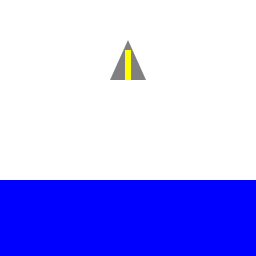

In [9]:
SVG(parse_svg_from_response(r.response))

In [10]:
llms_svg_df['svg'] = llms_svg_df.response.apply(parse_svg_from_response)

In [11]:
def check_svg_valid(svg):
    try:
        metric.svg_to_png(svg)
        return True
    except:
        return False

In [12]:
llms_svg_df['is_valid'] = llms_svg_df.svg.progress_apply(check_svg_valid)

  0%|          | 0/157 [00:00<?, ?it/s]

In [13]:
llms_svg_df['is_valid'].eq(False).sum()

2

In [14]:
llms_svg_df.loc[llms_svg_df['is_valid'].eq(False), 'model']

65     claude-3.7-sonnet
154              qwq-32b
Name: model, dtype: object

In [15]:
llms_svg_df = llms_svg_df[llms_svg_df['is_valid']].copy()
llms_svg_df.shape[0]

155

In [16]:
train_df['llms_svg'] = train_df.id.map(
    llms_svg_df.groupby('id').apply(lambda df: df.set_index('model').svg.to_dict())
)

<ipython-input-16-4ccccba14fff>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  llms_svg_df.groupby('id').apply(lambda df: df.set_index('model').svg.to_dict())


In [17]:
train_df.head()

,id,description,qa,question,choices,answer,llms_svg
0,02d892,a purple forest at dusk,"{'id': ['02d892', '02d892', '02d892', '02d892'...","[""What is the main setting of the image?"", ""Is...","[[""beach"", ""desert"", ""forest"", ""mountain""], [""...","[""forest"", ""yes"", ""dusk"", ""purple""]","{'gpt-4o-2024-08-06': '<svg viewBox=""0 0 256 2..."
1,0dcd2e,gray wool coat with a faux fur collar,"{'id': ['0dcd2e', '0dcd2e', '0dcd2e', '0dcd2e'...","[""What color is the coat?"", ""What part of the ...","[[""blue"", ""brown"", ""gray"", ""red""], [""collar"", ...","[""gray"", ""collar"", ""no"", ""wool""]","{'gpt-4o-2024-08-06': '<svg viewBox=""0 0 256 2..."
2,1e9ac1,a lighthouse overlooking the ocean,"{'id': ['1e9ac1', '1e9ac1', '1e9ac1', '1e9ac1'...","[""Is there an ocean visible in the image?"", ""W...","[[""no"", ""yes""], [""inside"", ""next to"", ""overloo...","[""yes"", ""overlooking"", ""no"", ""no""]","{'gpt-4o-2024-08-06': '<svg viewBox=""0 0 256 2..."
3,2b25db,burgundy corduroy pants with patch pockets and...,"{'id': ['2b25db', '2b25db', '2b25db', '2b25db'...","[""Are the pants yellow?"", ""Do the pants have p...","[[""no"", ""yes""], [""no"", ""yes""], [""no"", ""yes""], ...","[""no"", ""yes"", ""yes"", ""pants""]","{'gpt-4o-2024-08-06': '<svg viewBox=""0 0 256 2..."
4,4e6a54,orange corduroy overalls,"{'id': ['4e6a54', '4e6a54', '4e6a54', '4e6a54'...","[""What material is the item?"", ""Is a hat depic...","[[""corduroy"", ""denim"", ""leather"", ""silk""], [""n...","[""corduroy"", ""no"", ""yes"", ""overalls""]","{'gpt-4o-2024-08-06': '<svg viewBox=""0 0 256 2..."


## Calc Metrics

In [18]:
import copy

In [19]:
train_df['multiple_choice_qa'] = train_df.apply(
    lambda r: {
    'question': json.loads(r.question),
    'choices': json.loads(r.choices),
    'answer': json.loads(r.answer)
    },
    axis=1,
)

In [20]:
def get_llms_svg_scores(r, progress=False):
    res = {}
    for model, svg in tqdm(r.llms_svg.items(), disable=(not progress)):
        # import pdb; pdb.set_trace()
        # try:
        score = metric.score_instance(r.multiple_choice_qa, svg, random_seed=42)
        # except:
        #     score = None

        res[model] = score
    return res

In [21]:
train_df['llms_svg_scores'] = train_df.progress_apply(get_llms_svg_scores, axis=1)

  0%|          | 0/15 [00:00<?, ?it/s]

The 'batch_size' argument of HybridCache is deprecated and will be removed in v4.49. Use the more precisely named 'max_batch_size' argument instead.
The 'batch_size' attribute of HybridCache is deprecated and will be removed in v4.49. Use the more precisely named 'self.max_batch_size' attribute instead.


In [22]:
train_df.to_json('train_llms_svg_scores.jsonl', orient='records', lines=True, force_ascii=False)

In [23]:
metric_df = []
for r in train_df.itertuples():
    for model, score in r.llms_svg_scores.items():
        score = copy.deepcopy(score)
        score['model'] = model
        metric_df.append(score)

metric_df = pd.DataFrame(metric_df)

In [24]:
metric_df['cnt'] = 1

In [25]:
metric_df = metric_df.groupby('model').agg({
    'cnt': 'sum',
    'competition_score': 'mean',
    'vqa_score': 'mean',
    'ocr_score': 'mean',
    'aesthetic_score': 'mean',
})

In [26]:
metric_df = metric_df.sort_values('competition_score', ascending=False)
metric_df

,cnt,competition_score,vqa_score,ocr_score,aesthetic_score
model,,,,,
claude-3.7-sonnet,14,0.670475,0.774044,1.000000,0.451020
qwen2.5-14b-instruct,15,0.659007,0.779655,1.000000,0.418043
gpt-4o-2024-08-06,15,0.642722,0.753419,1.000000,0.417682
claude35_sonnet,15,0.642068,0.793884,0.915717,0.457980
Deepseek-R1,12,0.630112,0.798391,0.916667,0.460940
DeepSeek-V3,15,0.626853,0.714573,1.000000,0.435865
o1-mini,15,0.626618,0.719167,1.000000,0.434923
gemini-2.0-flash,15,0.622959,0.710487,1.000000,0.429490
qwq-32b,9,0.612915,0.713753,1.000000,0.432791


## Display

In [27]:
model_zoo = metric_df.index.tolist()

In [28]:
def display_one_example(r):
    # display(HTML(f'<h3>{r.description}<h3>'))
    plt.figure(figsize=(16, 12))
    plt.suptitle(r.description, y=0.93)
    for i, model in enumerate(model_zoo, 1):
        svg = r.llms_svg.get(model)
        svg_score = r.llms_svg_scores.get(model)
        plt.subplot(3, 4, i)
        if svg is None:
            plt.axis('off')
            plt.title(f'{model}', fontdict={'fontsize': 8})
        else:
            score = svg_score['competition_score']
            vqa = svg_score['vqa_score']
            ocr = svg_score['ocr_score']
            aes = svg_score['aesthetic_score']
            img = metric.svg_to_png(svg)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f'{model}\nscore={score:.2f}, vqa={vqa:.2f}, ocr={ocr:.2f}, aes={aes:.2f}', fontdict={'fontsize': 8})

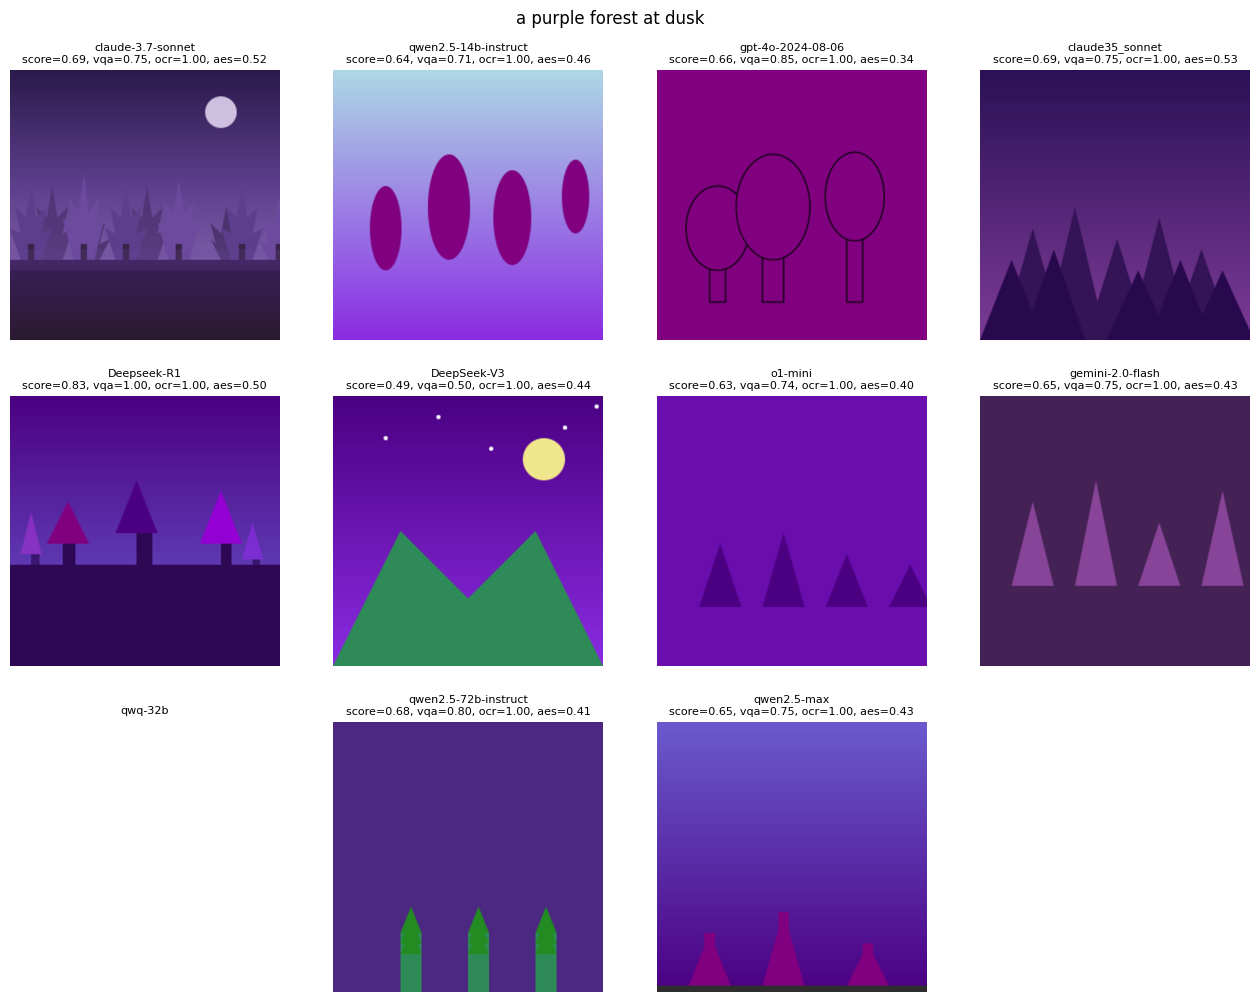

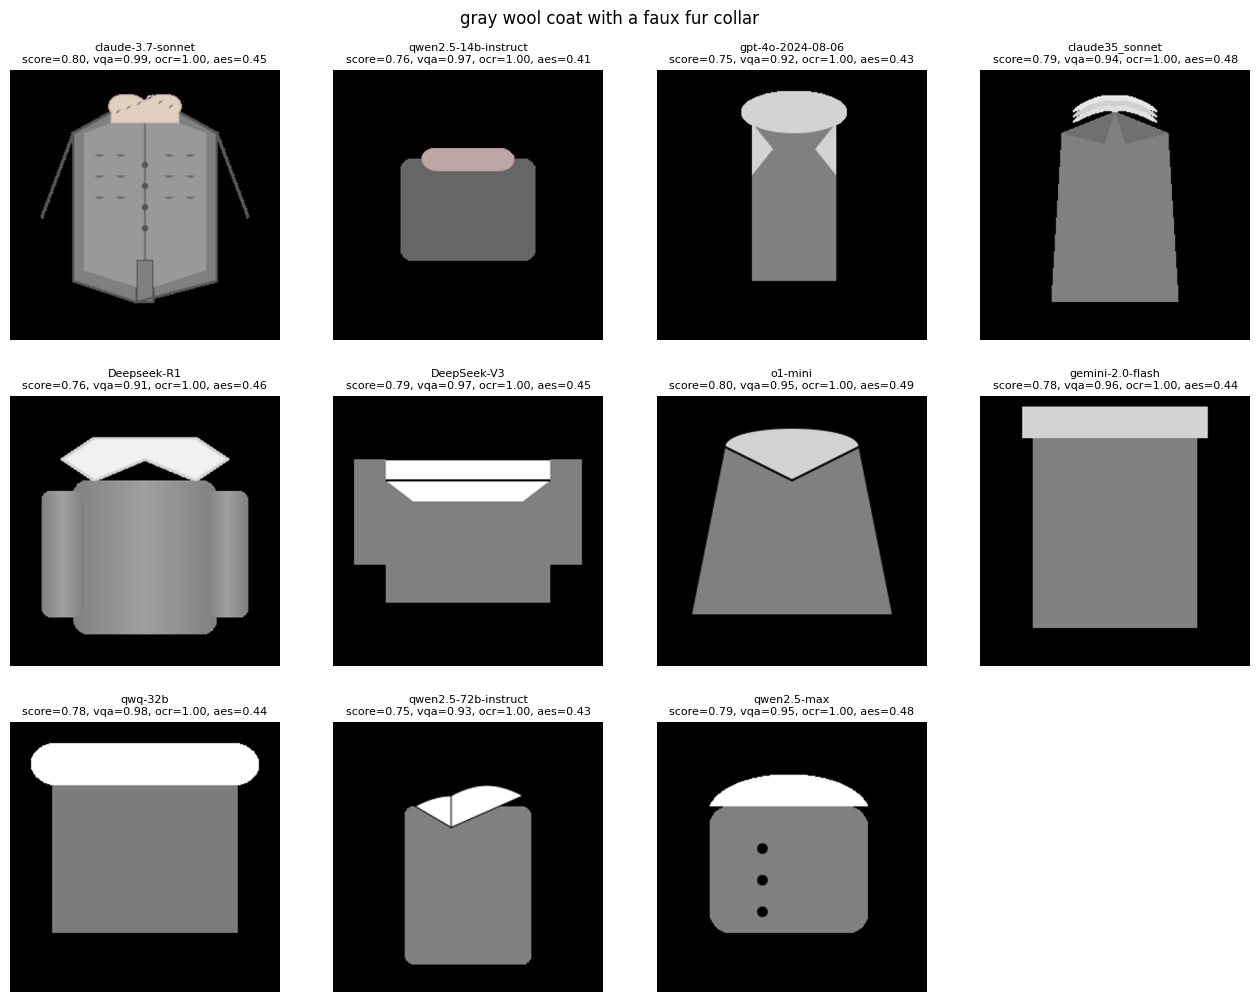

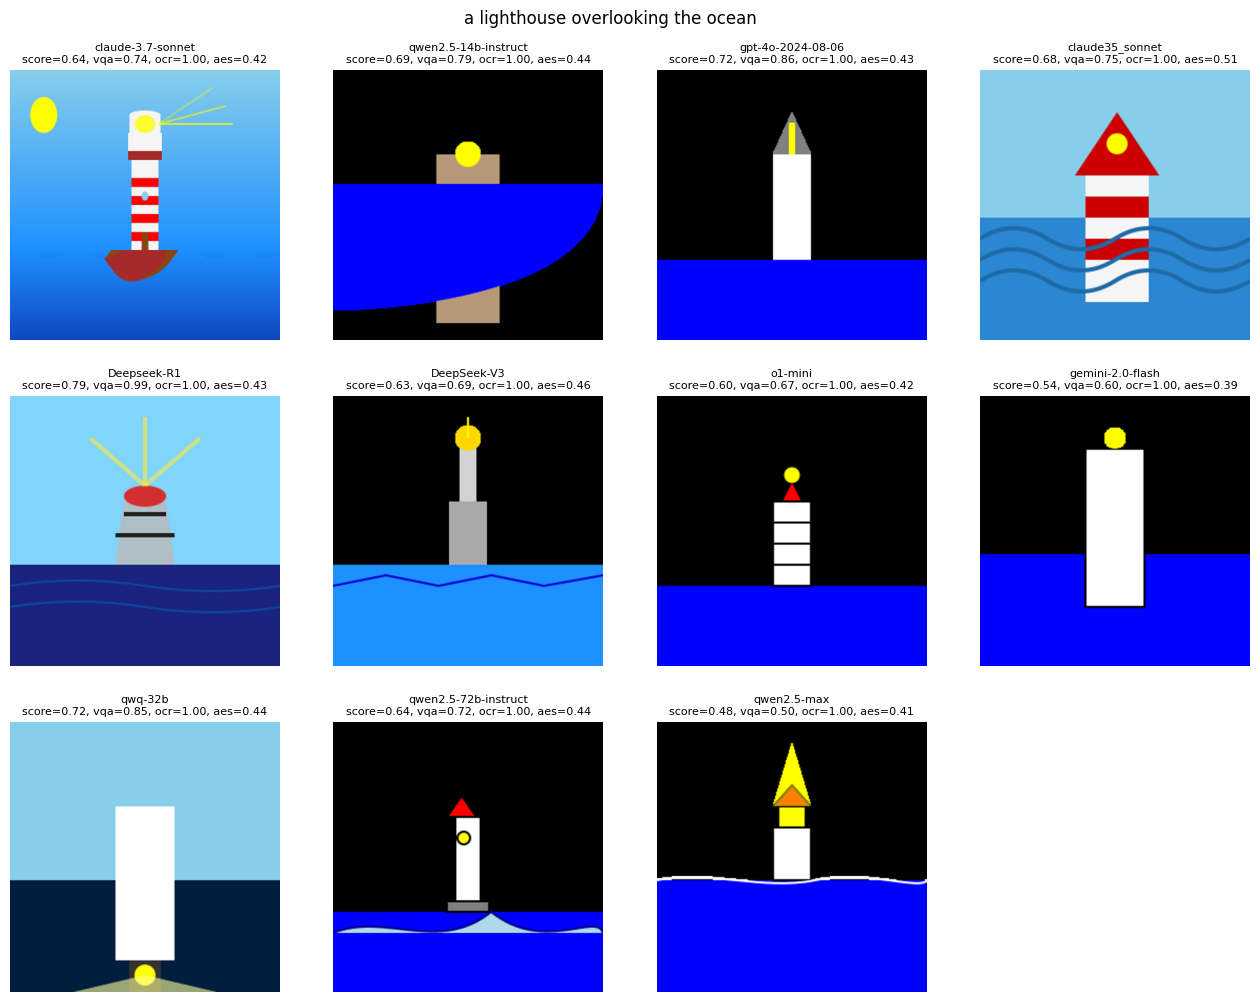

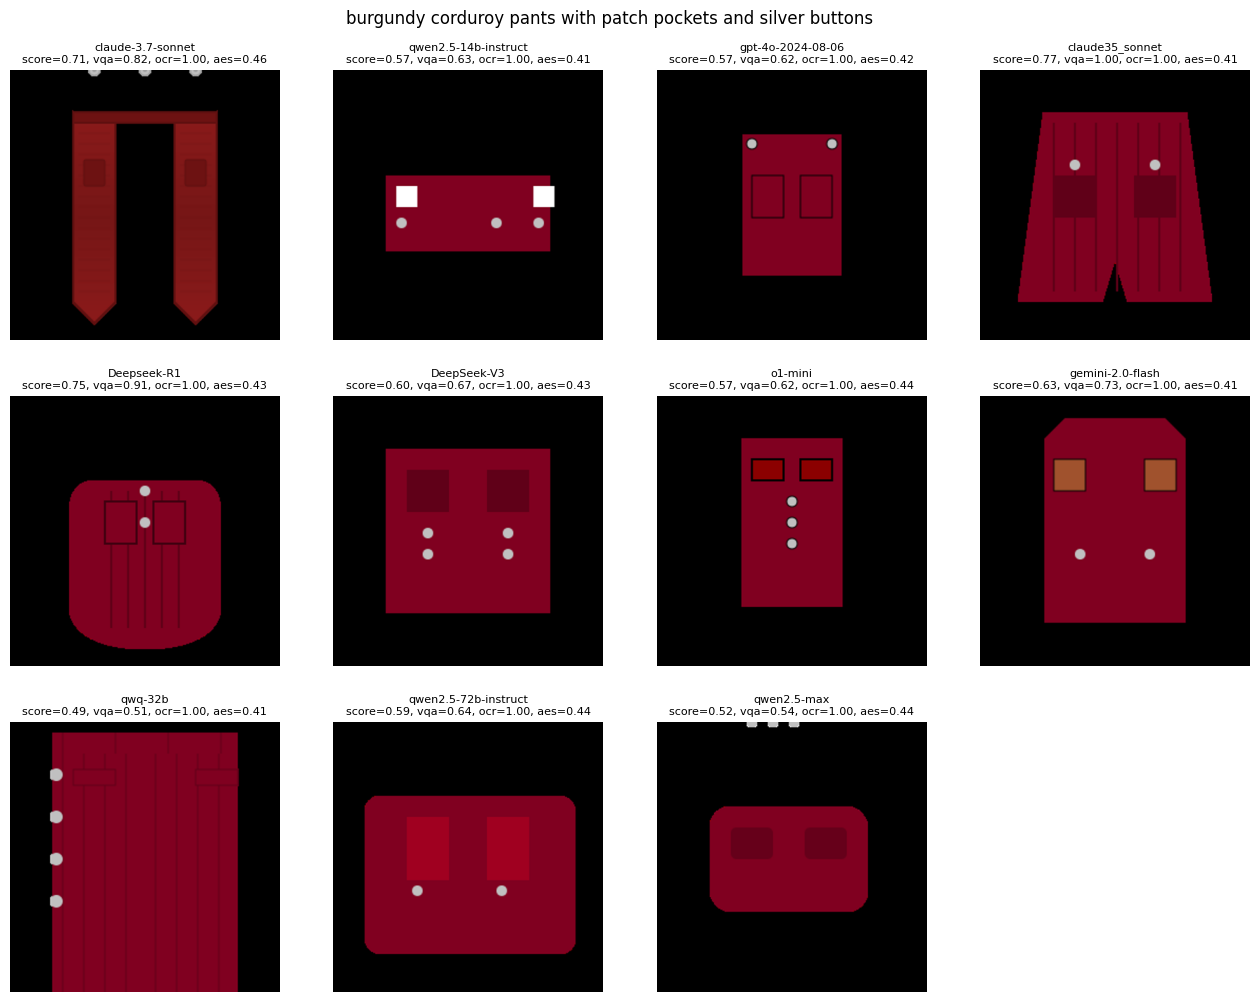

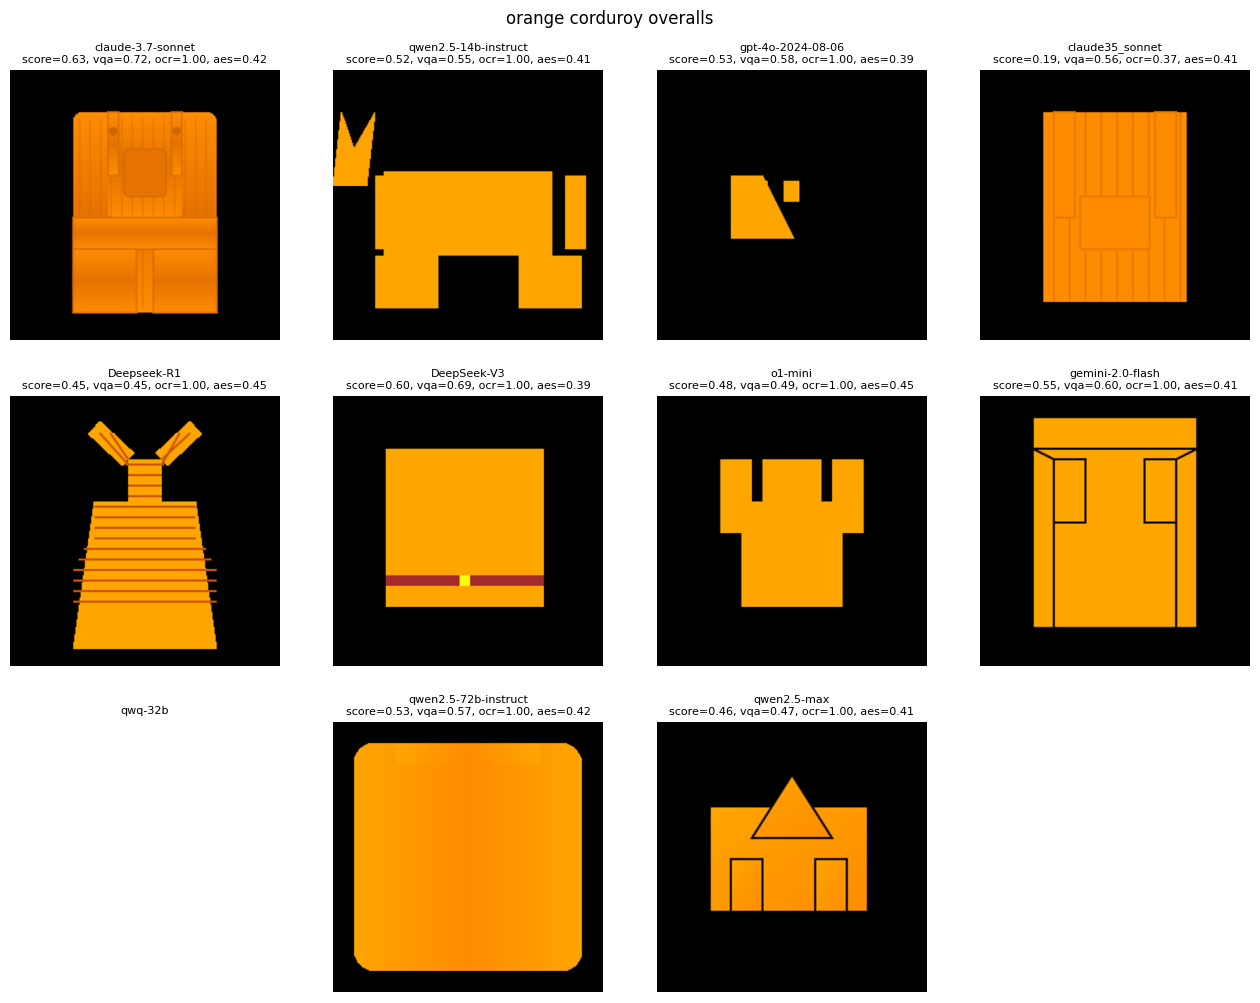

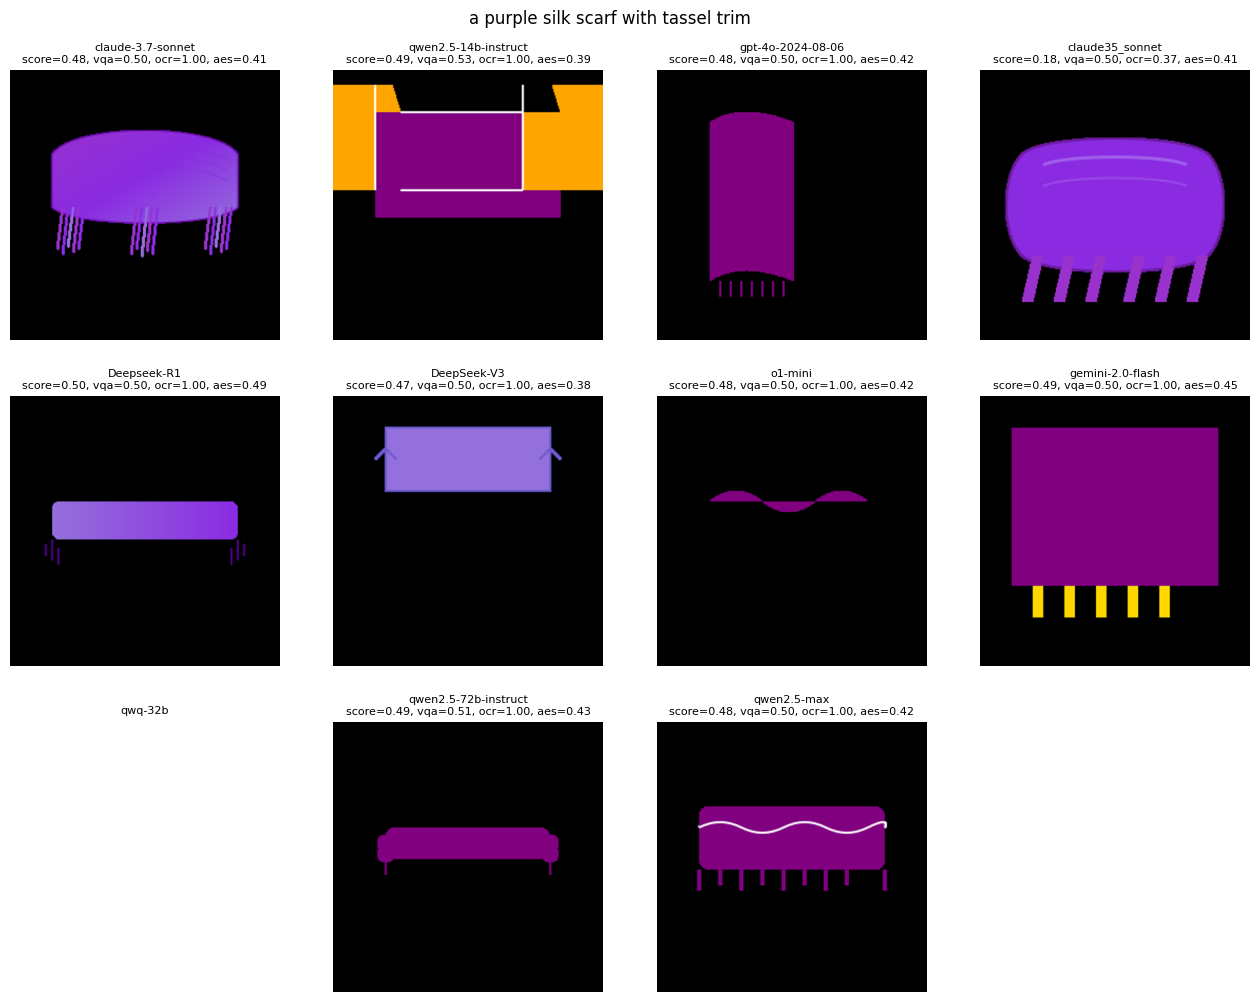

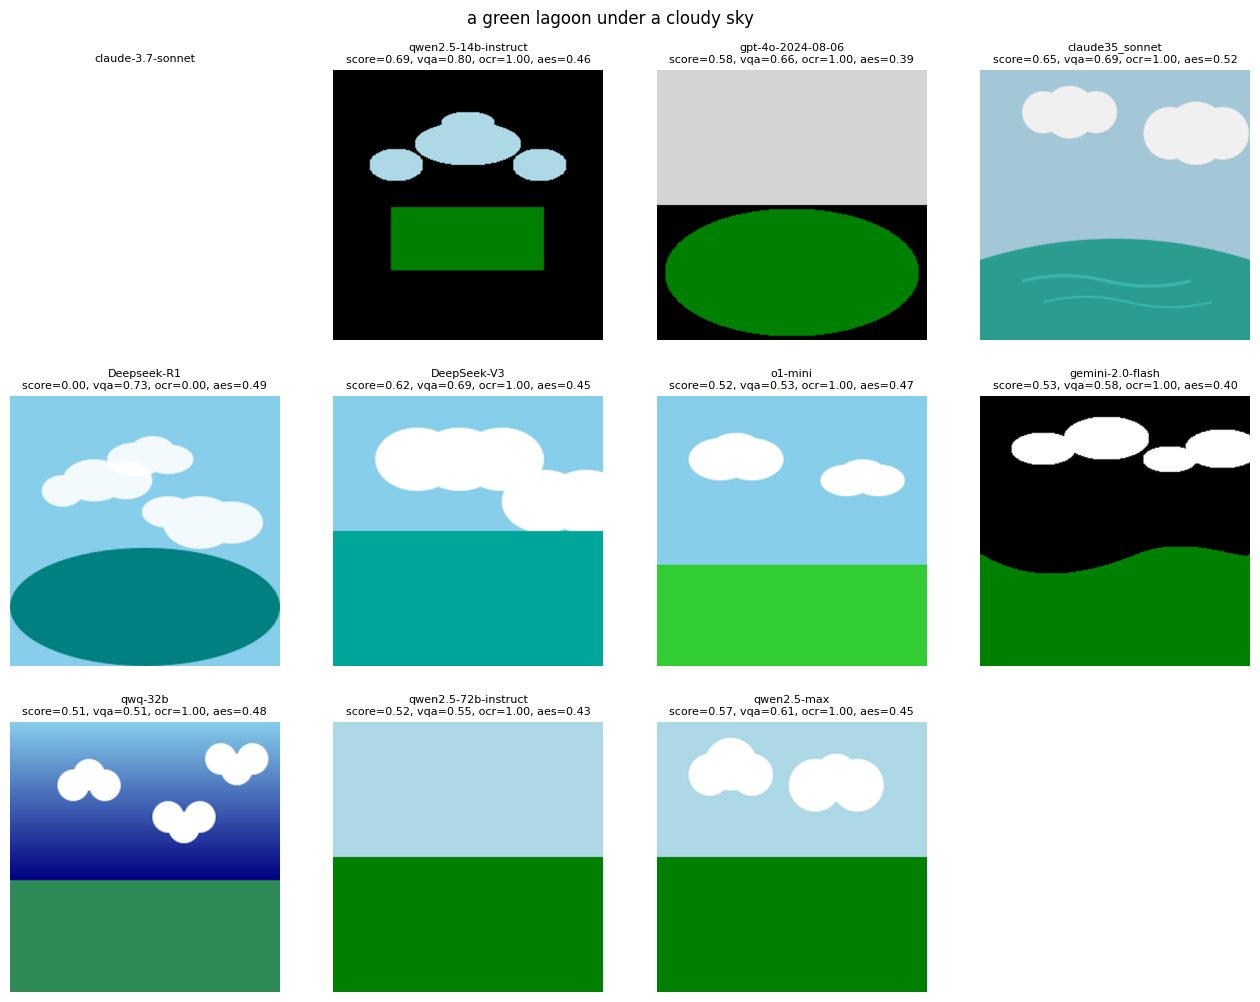

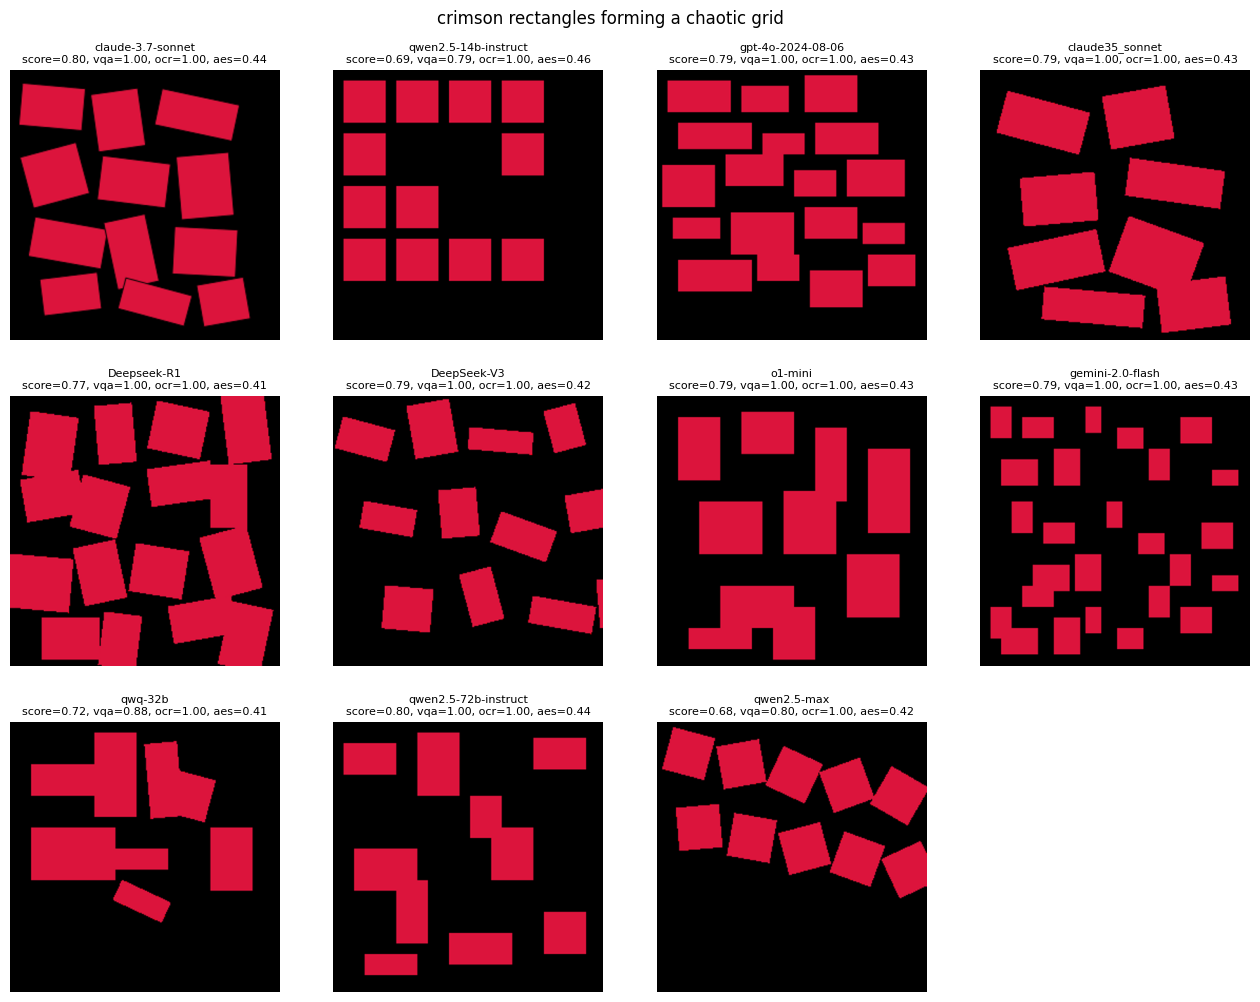

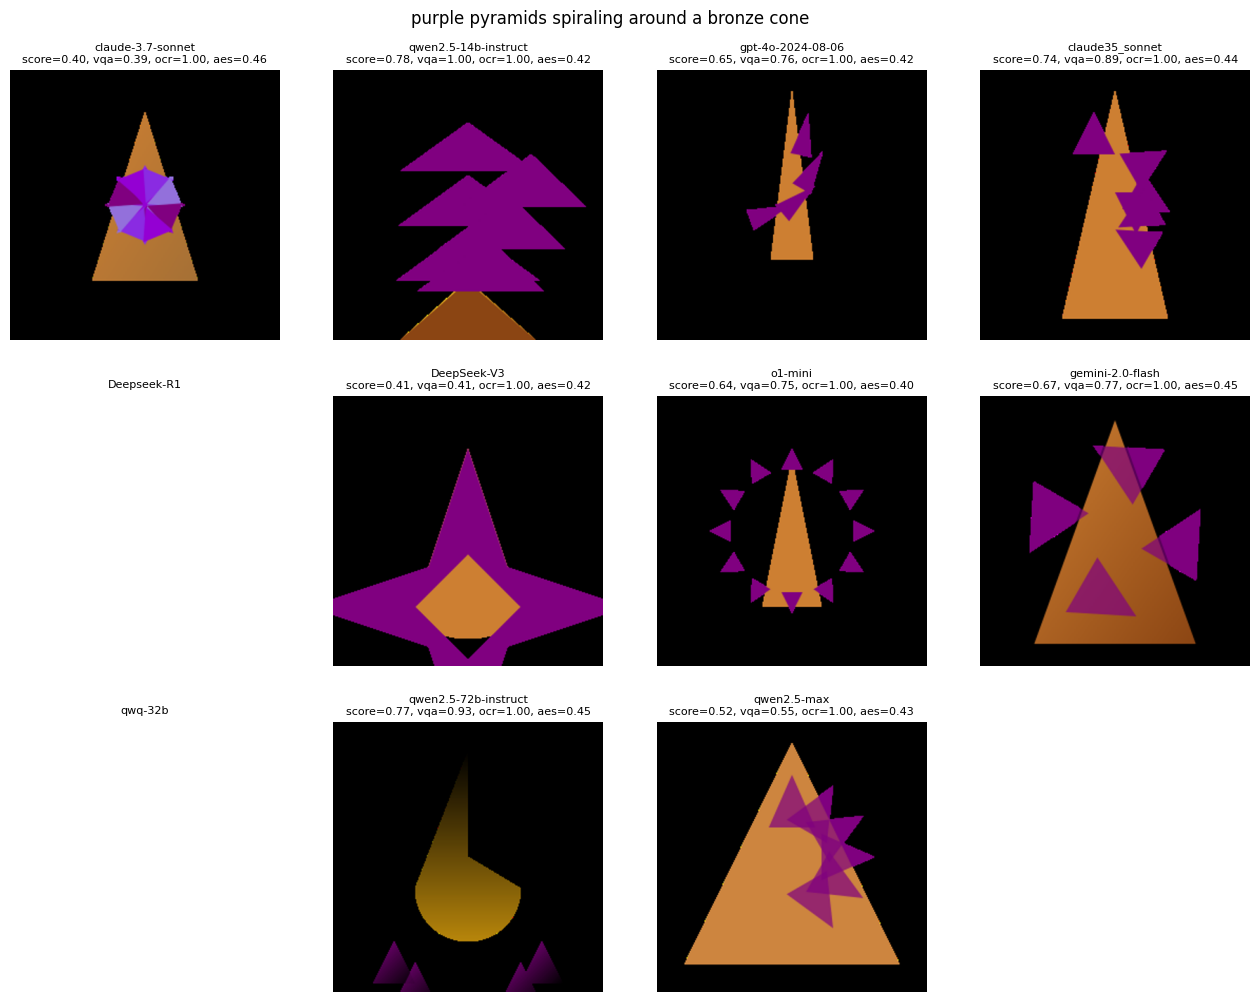

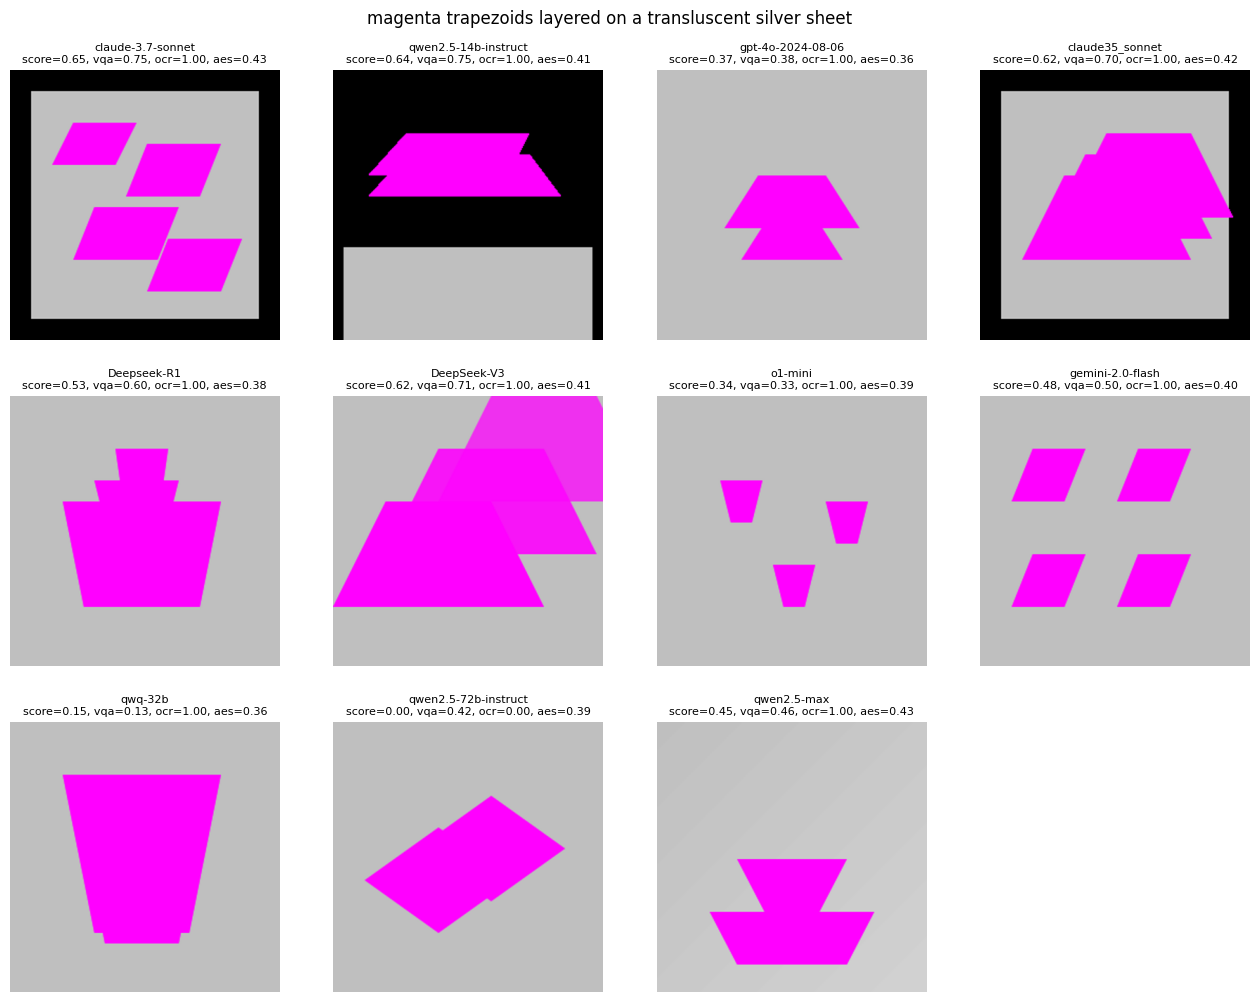

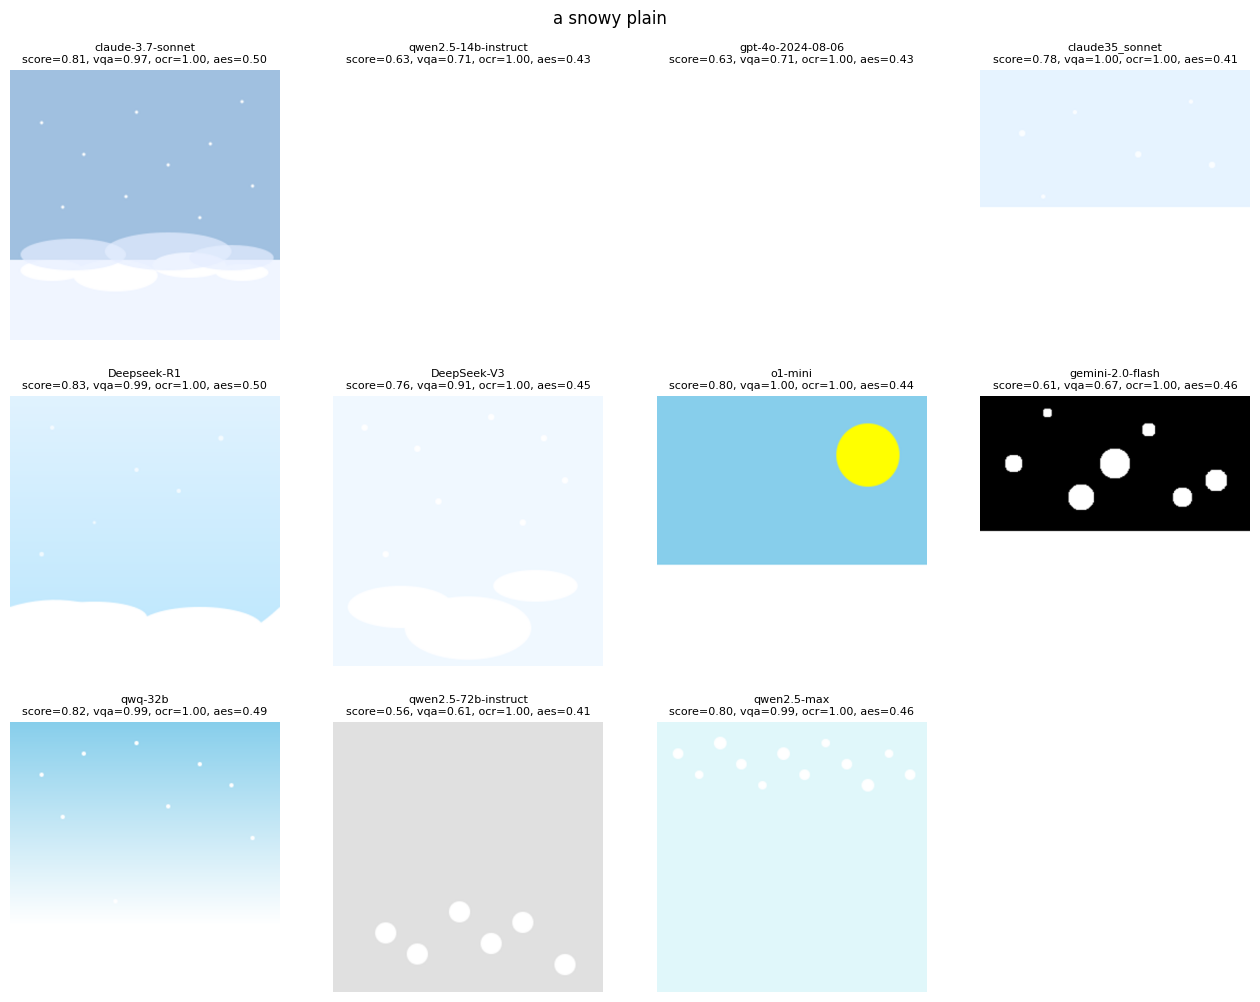

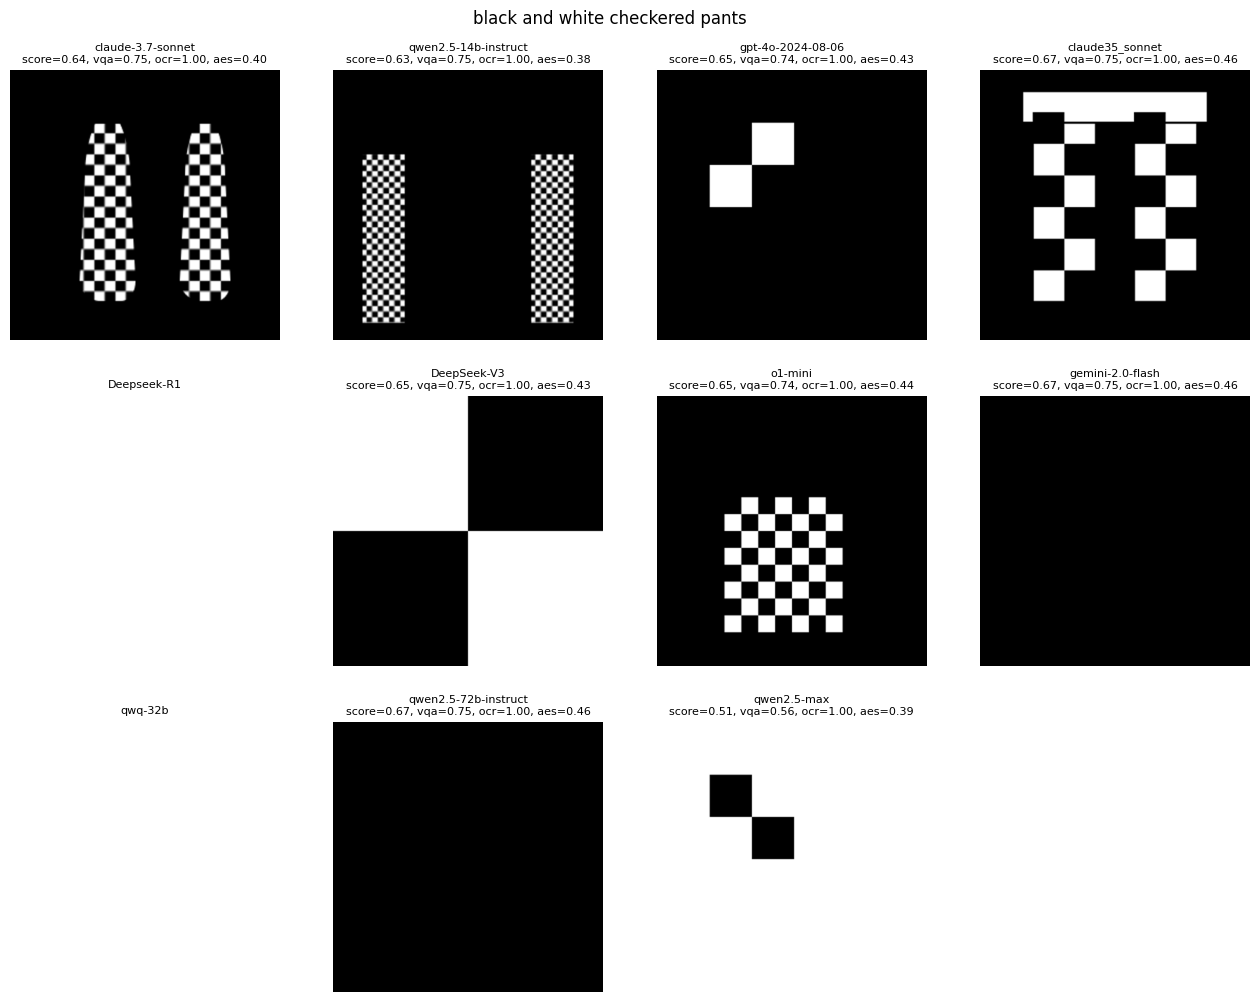

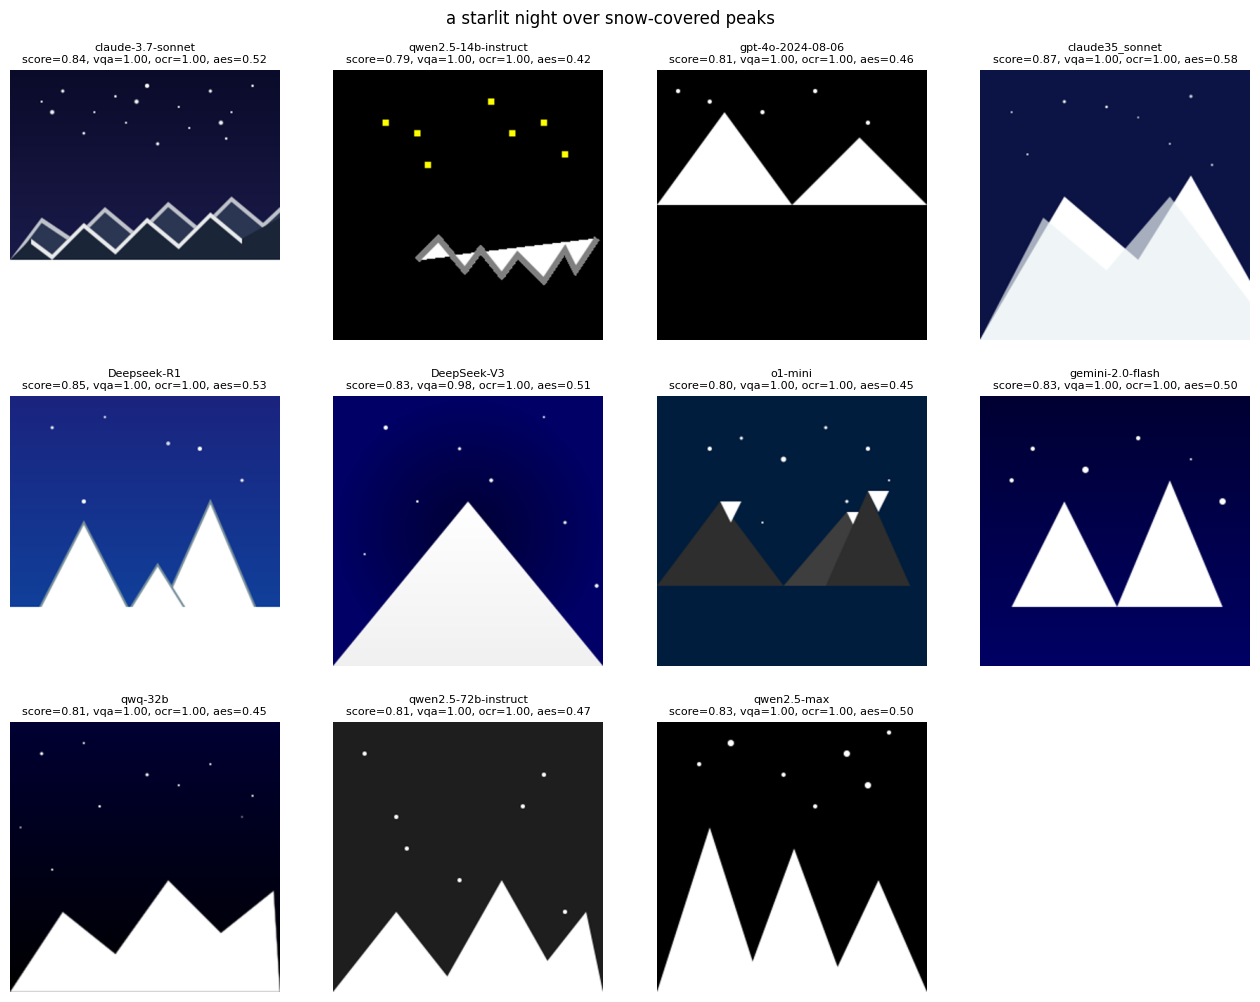

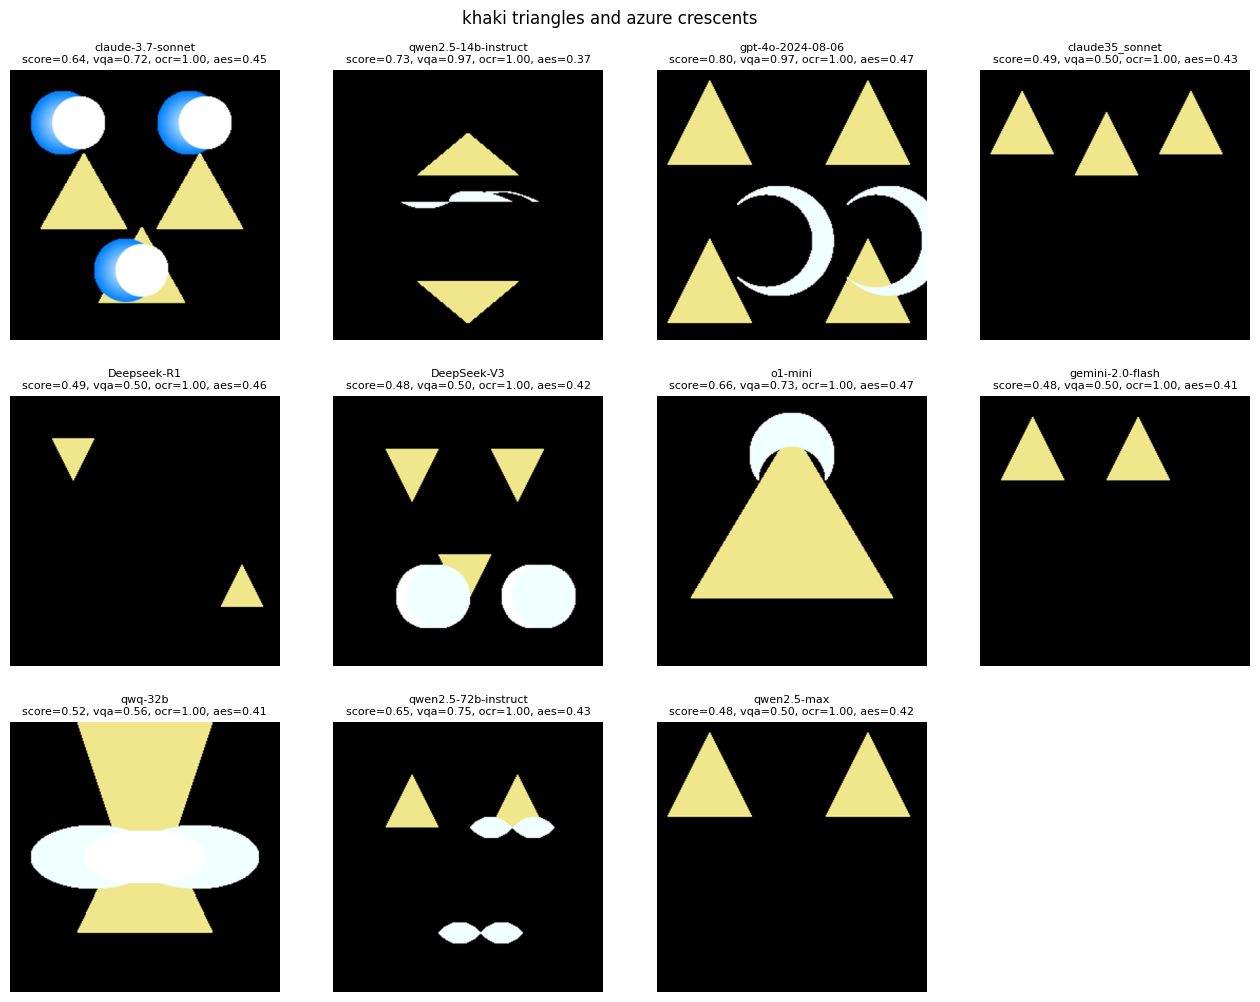

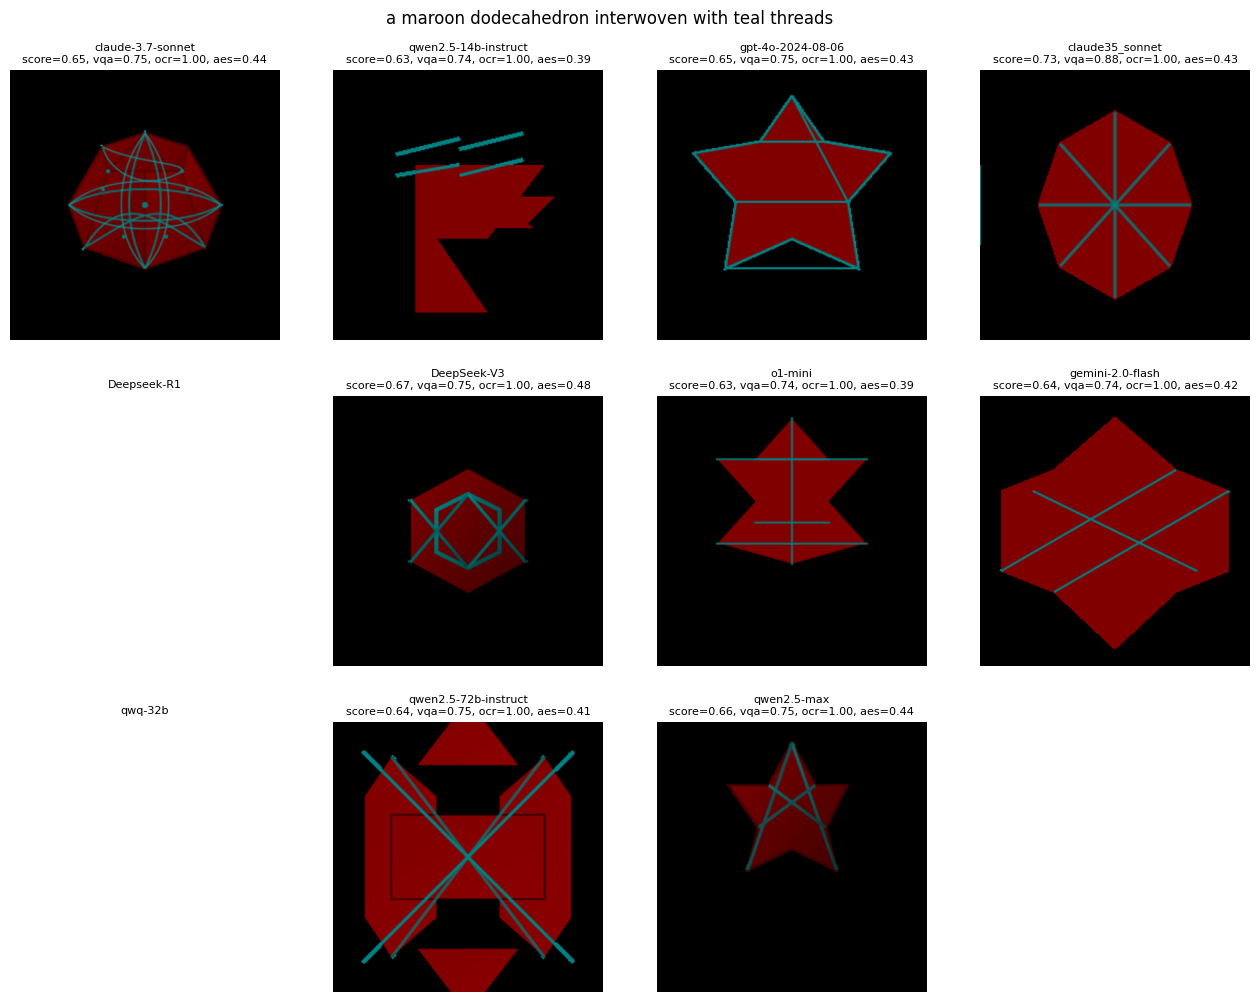

In [29]:
for r in train_df.itertuples():
    display_one_example(r)